In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [3]:
churn_df=pd.read_csv("ChurnData.csv")
churn_df.head()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [24]:
churn_df


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1


In [7]:
x=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'
       ]].values
type(x)

numpy.ndarray

In [8]:
y=np.asarray(churn_df['churn'])
type(y)

numpy.ndarray

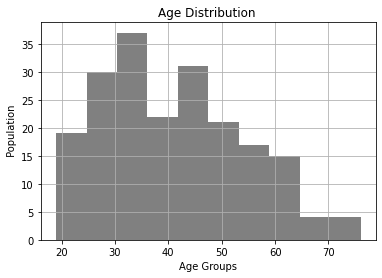

In [38]:
age=churn_df['age'].dropna().tolist()
plt.figure()
plt.hist(age,histtype='bar',color='grey')
plt.xlabel('Age Groups')
plt.ylabel(' Population')
plt.title('Age Distribution ')
plt.grid(True)
plt.show()


c:\users\kart b\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'age')

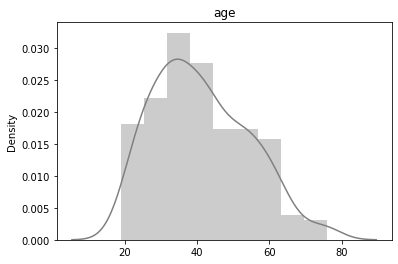

In [39]:
import seaborn as s
s.distplot(a=age,color='grey',vertical=False).set_title('age')

In [40]:
x

array([[11., 33.,  7., ...,  5.,  5.,  0.],
       [33., 33., 12., ...,  2.,  0.,  0.],
       [23., 30.,  9., ...,  1.,  2.,  0.],
       ...,
       [ 6., 32., 10., ...,  1., 10.,  0.],
       [24., 30.,  0., ...,  4.,  5.,  0.],
       [61., 50., 16., ...,  2., 22.,  1.]])

In [9]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-1.13518441, -0.62595491, -0.4588971 , ...,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , ..., -1.42318853,
        -0.92053635, -0.85972695],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -1.42318853,
        -0.02518185, -0.85972695],
       [-0.53296457, -0.85594447, -1.14970993, ...,  0.91629947,
        -0.58477841, -0.85972695],
       [ 1.18104577,  0.67731925,  0.42929083, ..., -0.6433592 ,
         1.31784991,  1.16316   ]])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [14]:
ypred=lr.predict(x_test)
ypred

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [16]:
y_proba=lr.predict_proba(x_test)
y_proba

array([[0.42147528, 0.57852472],
       [0.41177723, 0.58822277],
       [0.51662441, 0.48337559],
       [0.52144603, 0.47855397],
       [0.67237214, 0.32762786],
       [0.47706213, 0.52293787],
       [0.46991268, 0.53008732],
       [0.55488061, 0.44511939],
       [0.44191987, 0.55808013],
       [0.63689587, 0.36310413],
       [0.46851288, 0.53148712],
       [0.50214076, 0.49785924],
       [0.53852403, 0.46147597],
       [0.45926809, 0.54073191],
       [0.60999156, 0.39000844],
       [0.52726409, 0.47273591],
       [0.45246568, 0.54753432],
       [0.73729328, 0.26270672],
       [0.43471348, 0.56528652],
       [0.41190709, 0.58809291],
       [0.54020177, 0.45979823],
       [0.46835496, 0.53164504],
       [0.46889641, 0.53110359],
       [0.73859349, 0.26140651],
       [0.7569182 , 0.2430818 ],
       [0.58505419, 0.41494581],
       [0.5641001 , 0.4358999 ],
       [0.45842287, 0.54157713],
       [0.71384089, 0.28615911],
       [0.53127887, 0.46872113],
       [0.

In [25]:
from sklearn.metrics import jaccard_score,classification_report
acc=jaccard_score(y_test,lr.predict(x_test))
print (classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.53      0.89      0.67         9

    accuracy                           0.80        40
   macro avg       0.75      0.83      0.76        40
weighted avg       0.86      0.80      0.81        40



In [30]:
from sklearn.metrics import log_loss
a=log_loss(y_test,lr.predict_proba(x_test))
a

0.5867051755252554